# Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading and Cleaning

In [19]:
df = pd.read_csv(r"H:\Hazoom\Videos\Courses\ML - Cellula\Week 4\Task\final_internship_data.csv")
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,user_id,user_name,driver_name,car_condition,weather,traffic_condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,26:21.0,4.5,6/15/2009 17:26,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,52:16.0,16.9,1/5/2010 16:52,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,35:00.0,5.7,8/18/2011 0:35,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,30:42.0,7.7,4/21/2012 4:30,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,51:00.0,5.3,3/9/2010 7:51,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            500000 non-null  object 
 1   user_name          500000 non-null  object 
 2   driver_name        500000 non-null  object 
 3   car_condition      500000 non-null  object 
 4   weather            500000 non-null  object 
 5   traffic_condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [21]:
df.isna().sum()

user_id              0
user_name            0
driver_name          0
car_condition        0
weather              0
traffic_condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.drop(['user_id','user_name','key', 'pickup_datetime'], axis= 1, inplace=True)

In [25]:
df['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0])

# Outliers

## Checking Outliers of Certian Features

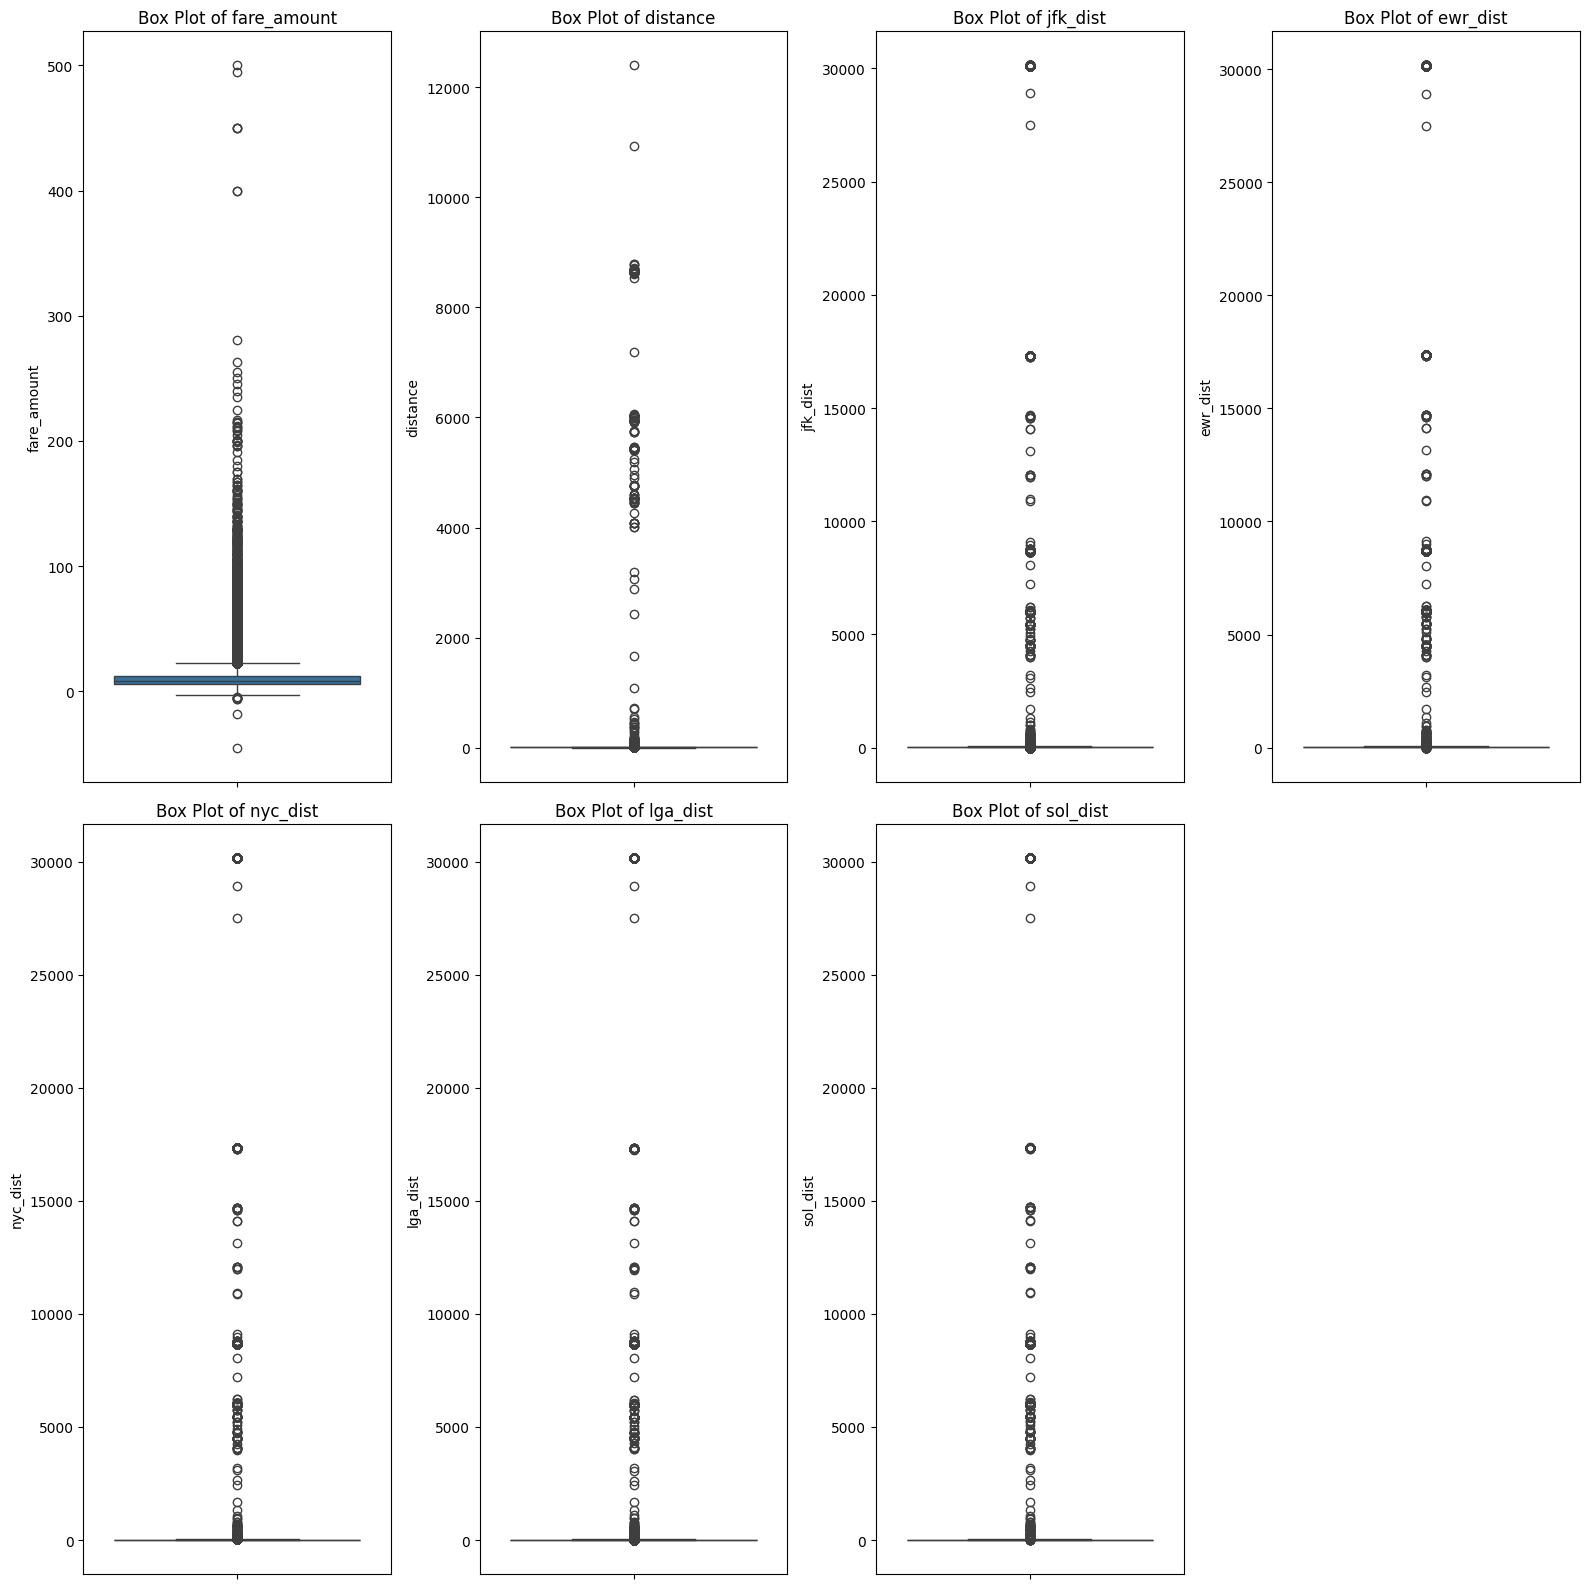

In [26]:
outlied_col = [
        'fare_amount',
    'distance',
    'jfk_dist',
    'ewr_dist',
    'nyc_dist',
    'lga_dist',
    'sol_dist'
]

i = 1
plt.figure(figsize=(16,16))

for col in outlied_col:
    plt.subplot(2,4, i)
    sns.boxplot(df, y= col)
    plt.title(f"Box Plot of {col}")
    i += 1

plt.tight_layout()

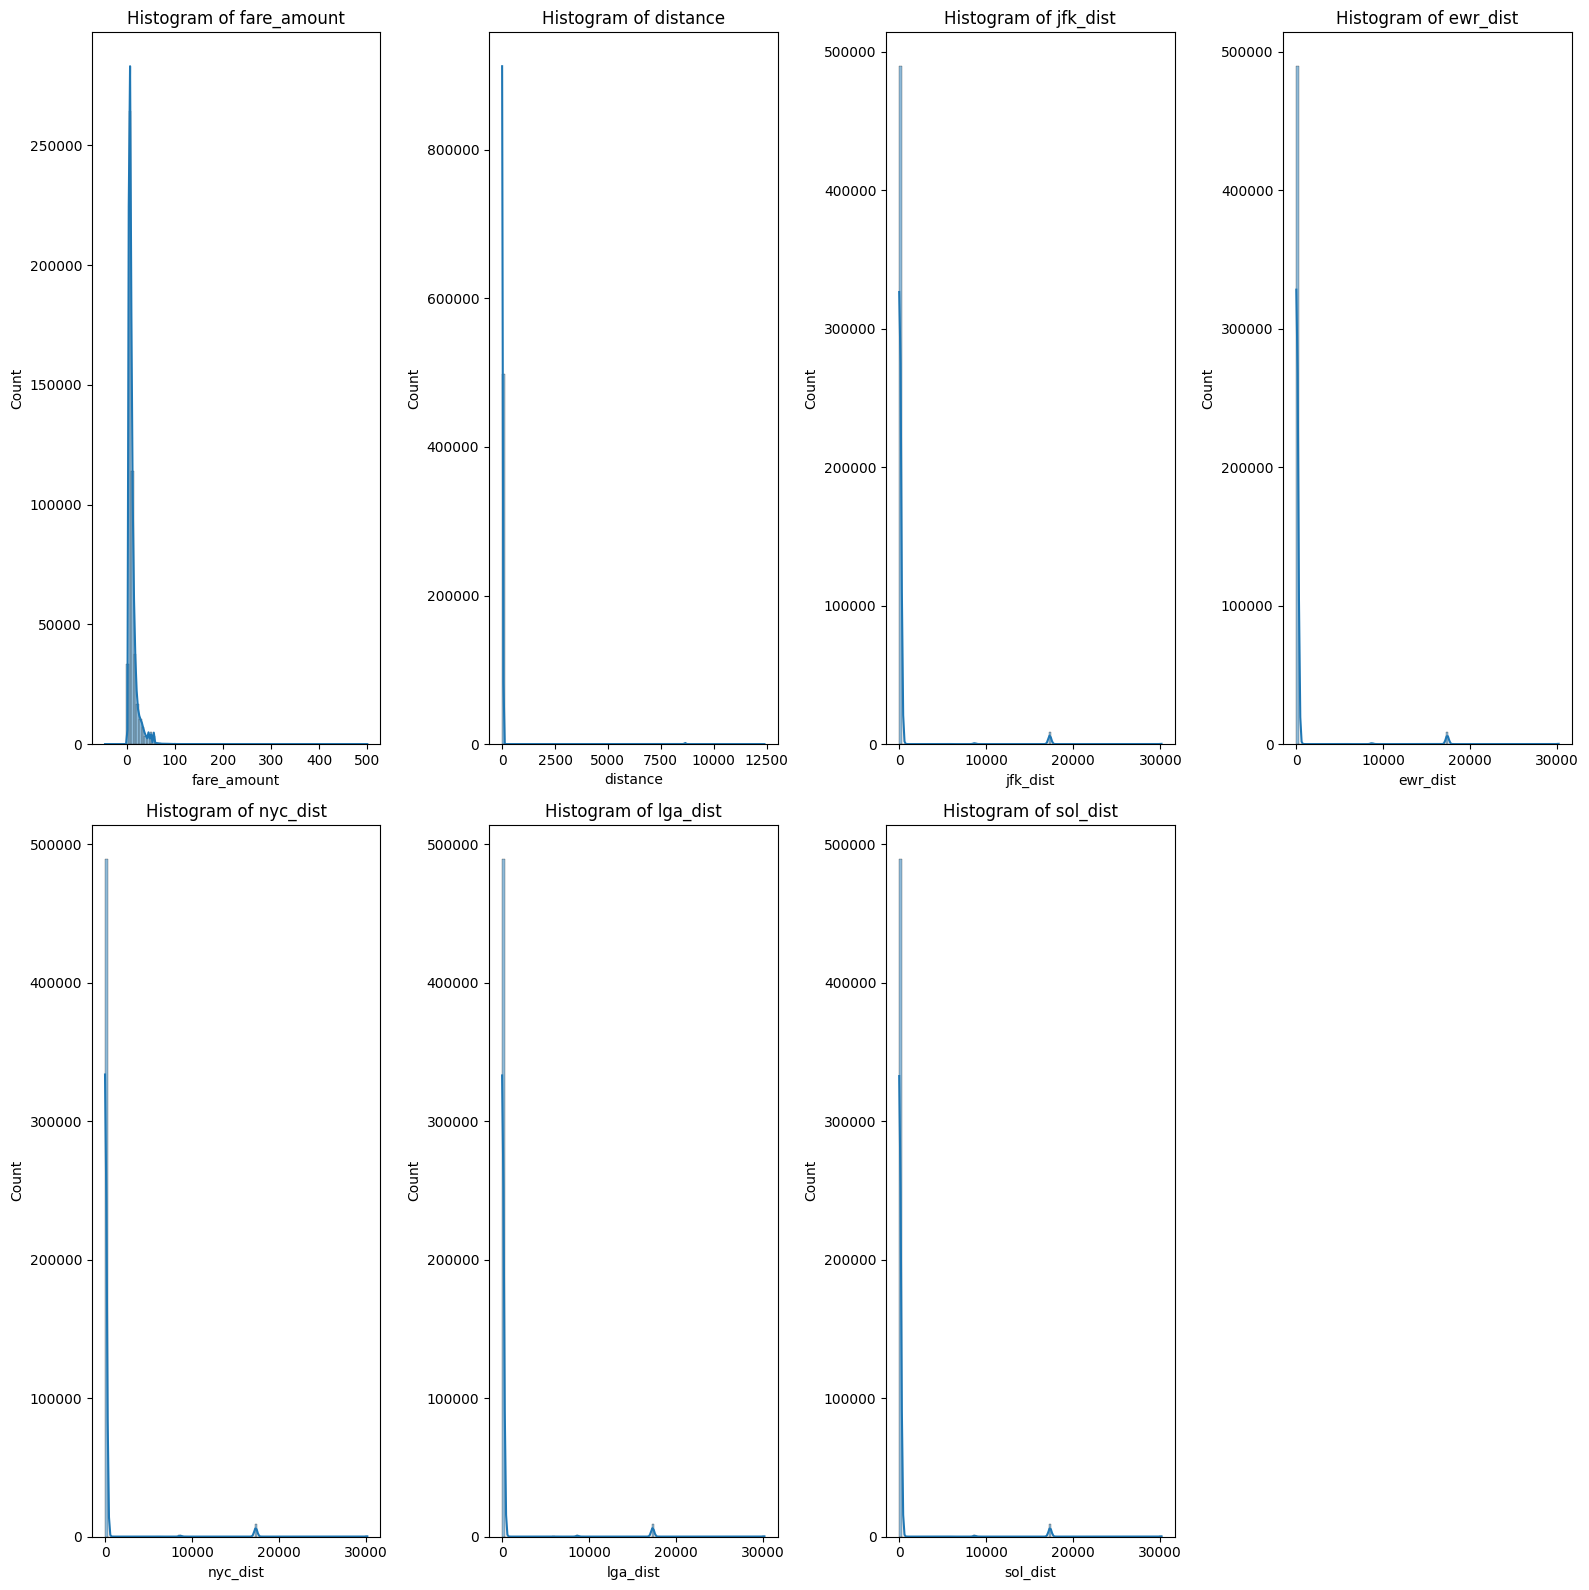

In [27]:
i = 1
plt.figure(figsize=(16,16))

for col in outlied_col:
    plt.subplot(2,4, i)
    sns.histplot(df[col], kde=True, bins=100)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    i += 1

plt.tight_layout()

## Getting The Total Number of Outlied Values

In [28]:
summary = []

for col in outlied_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    outliers = df[df[col] > upper]
    summary.append([
        col, 
        round(Q1, 2), 
        round(Q3, 2), 
        round(IQR, 2), 
        round(upper, 2), 
        len(outliers)
    ])

summary_df = pd.DataFrame(
    summary, 
    columns=['Column', 'Q1', 'Q3', 'IQR', 'Upper Bound', 'Outliers Count']
)

summary_df

,Column,Q1,Q3,IQR,Upper Bound,Outliers Count
0,fare_amount,6.00,12.50,6.50,22.25,43320
1,distance,1.21,3.89,2.68,7.90,41925
2,jfk_dist,41.34,43.79,2.44,47.45,20190
3,ewr_dist,32.17,38.30,6.13,47.50,27507
4,nyc_dist,7.15,14.45,7.30,25.40,21940
5,lga_dist,17.10,22.21,5.11,29.89,15942
6,sol_dist,14.89,22.42,7.53,33.71,18603


## Removing Outliers from Fare Amount

In [29]:
df = df[df['fare_amount'] >= 0]

In [30]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# EDA

## Counts of Categorical Data

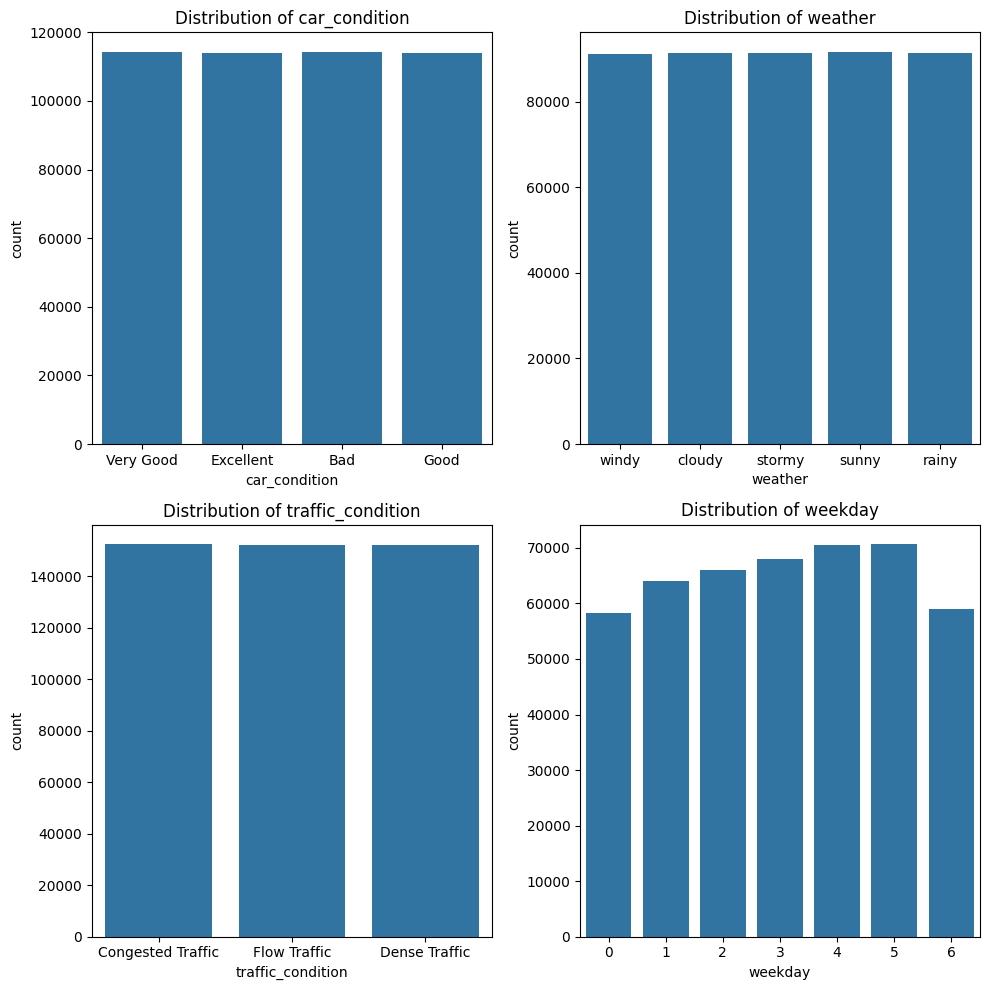

In [31]:
cat_data = [ 
    'car_condition', 
    'weather', 
    'traffic_condition', 
    'weekday' 
] 
 
plt.figure(figsize=(10,10)) 
i = 1 
for col in cat_data: 
    plt.subplot(2,2,i) 
    sns.countplot(df, x=col) 
    plt.title(f"Distribution of {col}") 
    i += 1 
 
plt.tight_layout()

## Checking Correlation Between Numercial Features

In [32]:
df_corr = df.corr(numeric_only=True)
df_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
fare_amount,1.000000,-0.000665,0.000936,-0.003211,0.003096,0.014760,-0.011417,0.001696,0.028227,0.020791,0.135801,-0.003321,-0.003136,-0.003093,-0.003217,-0.003155,0.002785,0.013074
pickup_longitude,-0.000665,1.000000,-0.591248,0.836091,-0.546959,-0.002388,0.000468,0.005859,-0.000136,-0.000720,0.005326,0.854564,0.854593,0.854573,0.854587,0.854586,0.097096,-0.016148
pickup_latitude,0.000936,-0.591248,1.000000,-0.712683,0.720592,0.001465,0.002237,-0.006897,0.003683,-0.003665,-0.008439,-0.875527,-0.875428,-0.875511,-0.875441,-0.875448,-0.116632,0.016885
dropoff_longitude,-0.003211,0.836091,-0.712683,1.000000,-0.448792,-0.001196,-0.000450,0.003642,-0.000811,0.000692,0.007002,0.854650,0.854714,0.854668,0.854700,0.854697,0.088577,-0.025367
dropoff_latitude,0.003096,-0.546959,0.720592,-0.448792,1.000000,0.001628,0.002370,-0.006265,0.002476,-0.002896,-0.008441,-0.809297,-0.809156,-0.809267,-0.809178,-0.809188,-0.127649,0.021568
passenger_count,0.014760,-0.002388,0.001465,-0.001196,0.001628,1.000000,0.017286,0.005289,0.005812,0.039008,0.004501,-0.002263,-0.002285,-0.002255,-0.002283,-0.002281,0.000004,0.002381
hour,-0.011417,0.000468,0.002237,-0.000450,0.002370,0.017286,1.000000,0.003264,-0.003018,-0.090471,0.003835,-0.001292,-0.001363,-0.001361,-0.001336,-0.001346,-0.001718,0.021343
day,0.001696,0.005859,-0.006897,0.003642,-0.006265,0.005289,0.003264,1.000000,-0.016104,0.006018,-0.009841,0.005517,0.005502,0.005517,0.005504,0.005505,0.002056,-0.003453
month,0.028227,-0.000136,0.003683,-0.000811,0.002476,0.005812,-0.003018,-0.016104,1.000000,-0.009109,-0.116660,-0.001994,-0.001990,-0.001985,-0.001993,-0.001993,0.000725,0.002662
weekday,0.020791,-0.000720,-0.003665,0.000692,-0.002896,0.039008,-0.090471,0.006018,-0.009109,1.000000,0.011088,0.001573,0.001558,0.001669,0.001531,0.001538,-0.001844,-0.002395


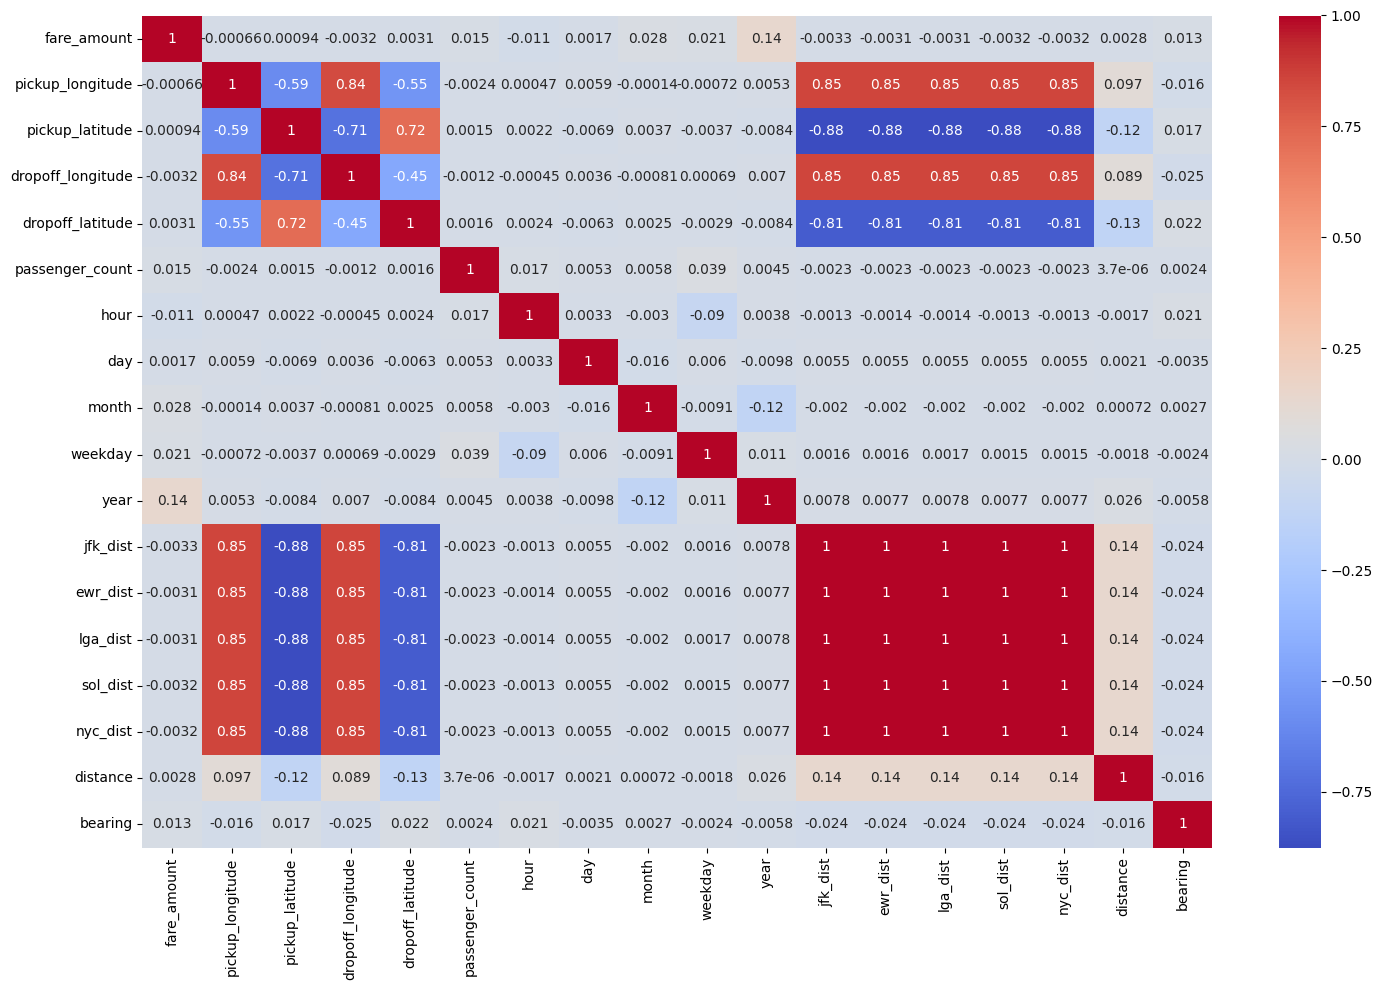

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df_corr, annot= True, cmap='coolwarm')
plt.tight_layout()

## Relationship Between Distances and Fare Amount

<Axes: xlabel='distance', ylabel='fare_amount'>

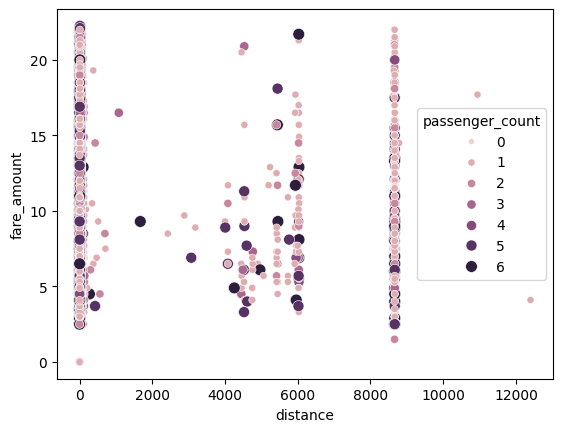

In [34]:
sns.scatterplot(df , x = 'distance', y='fare_amount', size= 'passenger_count', hue='passenger_count')

## Relationship Between Fare Amount and Other Numerical Features

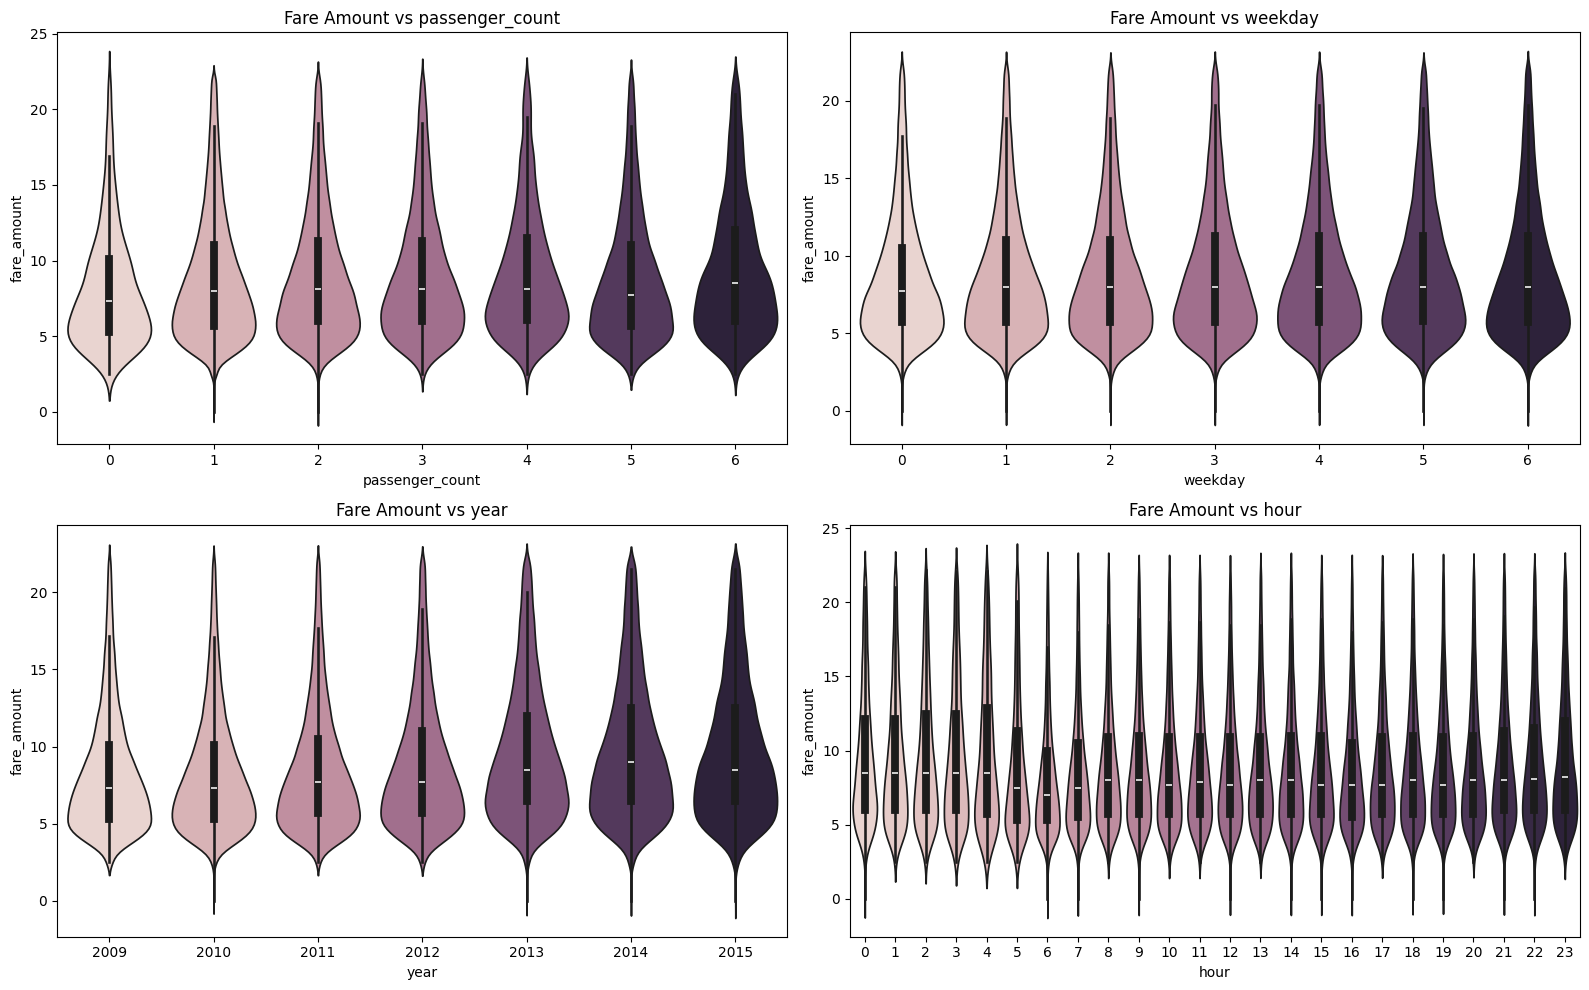

In [47]:
cols = ['passenger_count', 'weekday', 'year', 'hour']

plt.figure(figsize=(16,10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df, x=col, y='fare_amount',hue=col, legend=False)
    plt.title(f"Fare Amount vs {col}")
    plt.xticks(rotation=0)

plt.tight_layout()

## Relationship Between Fare Amount and External Factors

<Axes: xlabel='traffic_condition', ylabel='fare_amount'>

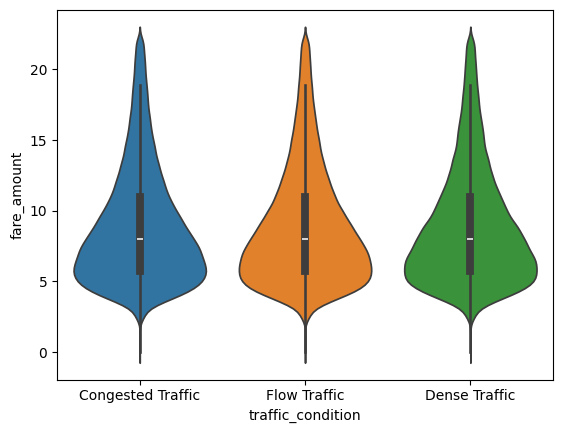

In [35]:
sns.violinplot(data=df, x="traffic_condition", y="fare_amount", hue='traffic_condition')

<Axes: xlabel='weather', ylabel='fare_amount'>

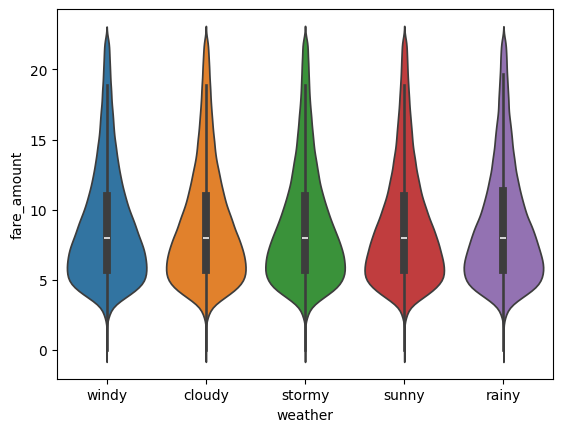

In [36]:
sns.violinplot(data=df, x="weather", y="fare_amount",hue='weather')

<Axes: xlabel='car_condition', ylabel='fare_amount'>

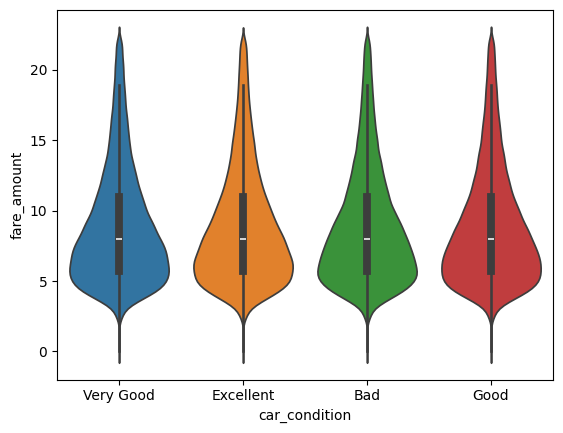

In [37]:
sns.violinplot(data=df, x="car_condition", y="fare_amount",hue='car_condition')

## Checking Relationship Between Number of Trips and External Factors

In [42]:
pv1 = pd.crosstab(index=df['weather'], columns='count_of_trips')
pv2 = pd.crosstab(index=df['car_condition'], columns='count_of_trips')
pv3 = pd.crosstab(index=df['traffic_condition'], columns='count_of_trips')
pv4 = pd.crosstab(index=df['weekday'], columns='count_of_trips')
pv5 = pd.crosstab(index=df['passenger_count'], columns='count_of_trips')

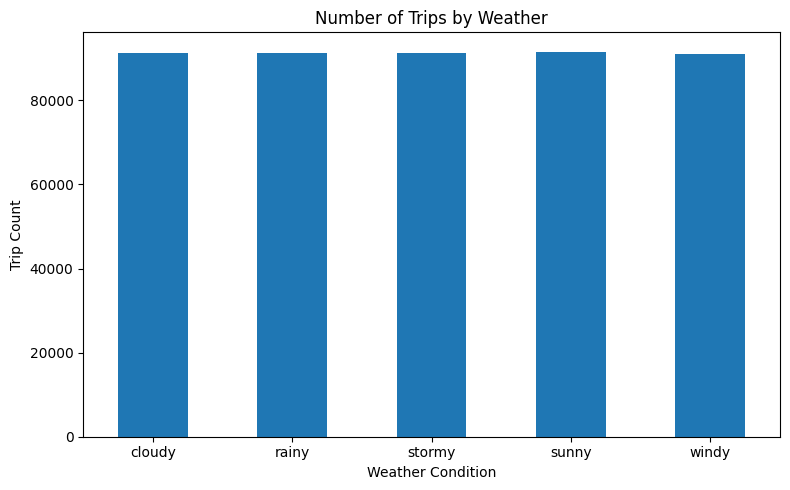

In [43]:
pv1.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Number of Trips by Weather")
plt.ylabel("Trip Count")
plt.xlabel("Weather Condition")
plt.xticks(rotation=0)
plt.tight_layout()

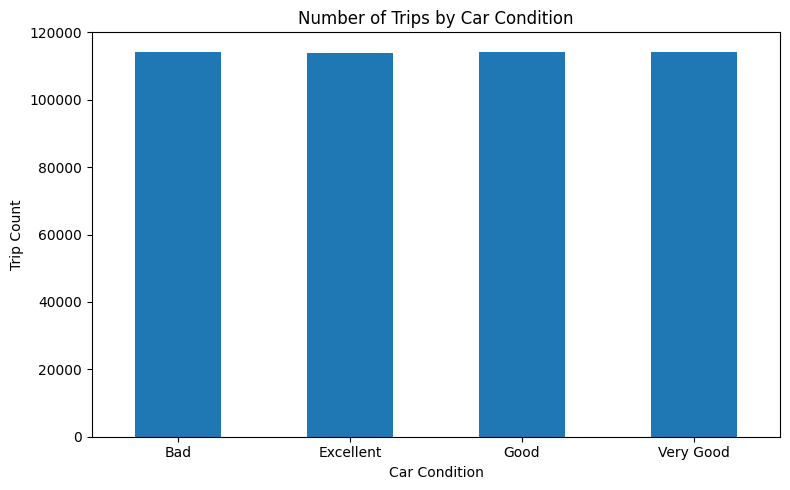

In [44]:
pv2.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Number of Trips by Car Condition")
plt.ylabel("Trip Count")
plt.xlabel("Car Condition")
plt.xticks(rotation=0)
plt.tight_layout()

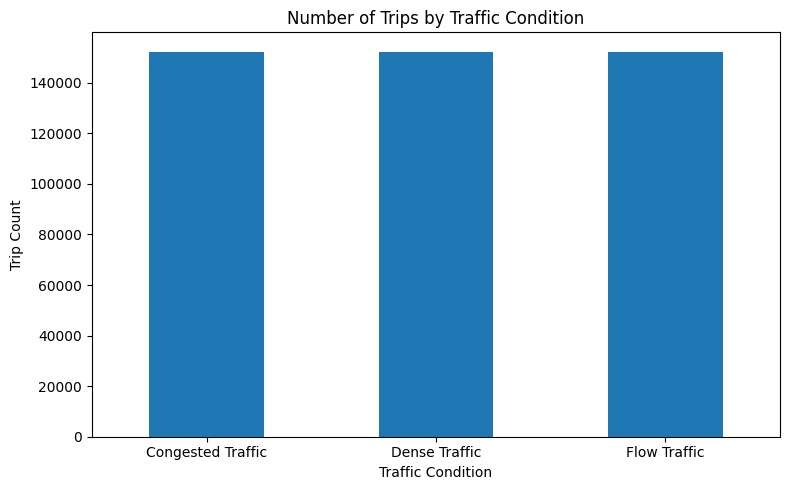

In [45]:
pv3.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Number of Trips by Traffic Condition")
plt.ylabel("Trip Count")
plt.xlabel("Traffic Condition")
plt.xticks(rotation=0)
plt.tight_layout()

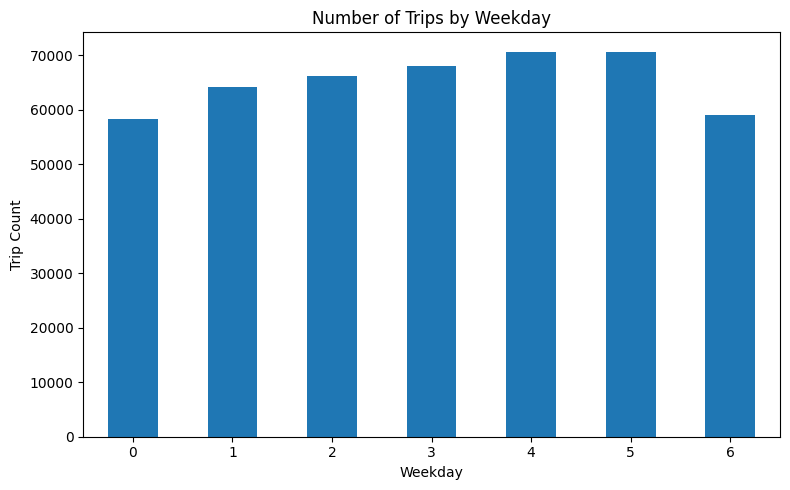

In [41]:
pv4.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Number of Trips by Weekday")
plt.ylabel("Trip Count")
plt.xlabel("Weekday")
plt.xticks(rotation=0)
plt.tight_layout()

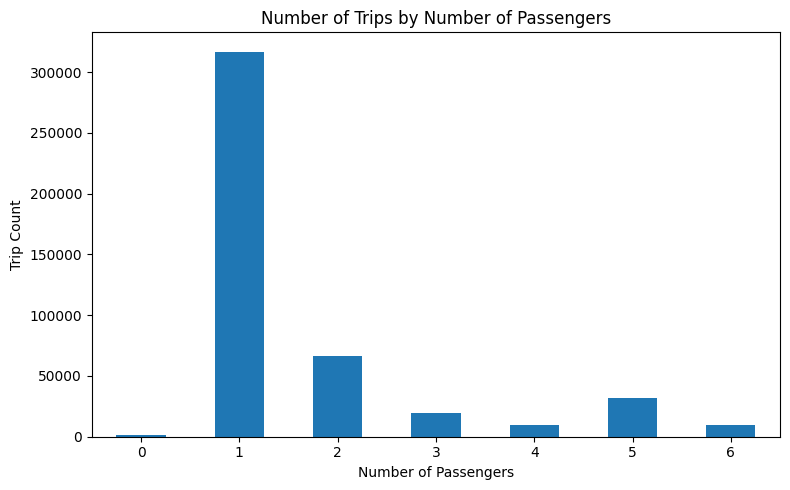

In [40]:
pv5.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Number of Trips by Number of Passengers")
plt.ylabel("Trip Count")
plt.xlabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()